# Introduction to Convolutional Neural Networks

## Welcome!
This exercise serves as an introduction to building, training and testing a convolutional neural network using TensorFlow.

At the end of this exercise, you should be confident to use TensorFlow to train your own conv-net on image data (or spatially related data) of your choice and to analyse and interprete the output of the model.

You may refer to the lecture slides that accompany this notebook, in case you need a reference point.

## Preparing this notebook
Let us start by setting up our coding environment. 

The first thing you might want to do is to enable GPU usage for this notebook. You can do so by going to Edit -> Notebook Settings, clicking on Hardware Accelerator and selecting GPU. This is not strictly necessary for this exercise as we are working with small datasets and small networks. However, it does help speed up computation even with what we are working with.

Next, lets import all the software packages that we will need for this exercise, most importantly TensorFlow. You may do so by running the block of code below by clicking the right-arrow button at the top left of the cell. If an error occurs, the circle would turn red - get help from your instructor. If it runs fine, you should see the currently used version of TensorFlow printed out below.

In [1]:
# Load all libraries and helper functions
import tensorflow as tf
import numpy as np
import sys
import pandas as pd
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
print("TensorFlow version %s is loaded." % tf.__version__)

TensorFlow version 2.0.0 is loaded.


## Sanity check
Let's check that TensorFlow works correctly by creating a tensor that contains a constant string "Hello World!" and then printing it out to console.

In [0]:
hello_world = tf.constant("Hello World!", name="sanity_check")
print('Prints the tensor itself: ', hello_world)
tf.print('Prints the values of the tensor: ', hello_world, output_stream=sys.stdout)

Notice that the variable hello_world itself is a tensor. If you wish to print the values of a tensor, you could use the tf.print method.

## Inspecting the data

We will be working with the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a very popular dataset of hand-written digits.

The dataset contains 70,000 images, where each image contains a single hand-written digit from 0 to 9 and is of size 28x28 pixels in greyscale. Each image also has an accompanying label: a digit (0 to 9) representing the digit that the image contains. Our aim is to build a convolutional neural network that takes as input each image, and predicts (as a single digit) what digit the image contains.

The code below loads and scales the data for our use. The data is automatically grouped into inputs and labels, and split into a training and testing set.


In [2]:
# Load the mnist dataset built into TensorFlow
mnist = tf.keras.datasets.mnist
(inputs_train, labels_train), (inputs_test, labels_test) = mnist.load_data()
# Squash the training data to values that range between 0 and 1.
inputs_train, inputs_test = inputs_train / 255.0, inputs_test / 255.0


11493376/11490434 [==============================] - 1s 0us/step


Let's try to visualise some of the images. Run the following code a few times to inspect multiple samples.

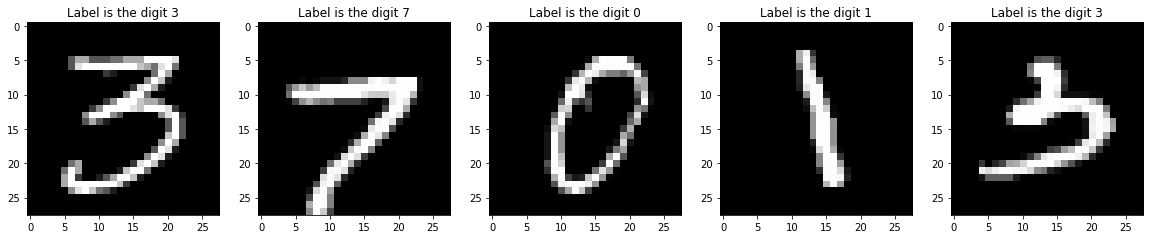

In [3]:
plt.figure(1, figsize=(20,10))
for i in range(5):
    char_idx = np.random.randint(inputs_train.shape[0])
    plt.subplot(150 + i + 1)
    plt.title("Label is the digit %s" % (labels_train[char_idx]))
    plt.imshow(inputs_train[char_idx], cmap='gray')
plt.show()

Print the shape of each of your data objects to have a better idea of how the data is structured.

The TensorFlow network that we want to build will take inputs with shape (number of samples, height, width, channels). Does the shapes you see match with the required shape? If not, you may wish to use the [np.expand_dims](https://numpy.org/doc/1.18/reference/generated/numpy.expand_dims.html) function to modify the shape of your data.

In [0]:
# Print the shapes of your data objects

# Modify the shapes of the relevant data objects
# Hint: channels should be 1


Once you have gotten your data into the right shape, we can now use the tf.data API to easily shuffle and batch our dataset. Inspect and run the code cell below.

What batch size are we using?

In [7]:
# Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices((inputs_train, labels_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((inputs_test, labels_test)).batch(32)

## Building a convolutional neural network
Now that we have our data ready, we can switch our attention to designing and constructing our conv-net model.

As mentioned above, our aim is to build a convolutional neural network that takes as input each image, and predicts what digit the image contains. Since there are 10 possible digits, we can see this as a classification task across 10 categories.

There are generally speaking two ways you can build and train a model in TensorFlow. The first is to use the Keras API such as:
*   models.Sequential()
*   model.fit()
*   model.evaluate()

You might already be familiar with this approach. The high level Keras API is very easy to use, however it may lack the flexibility that an advanced user might require. Today we will be looking at the second more manual but also more flexible approach.

The code below is an incomplete example showing how a model could be set up using this second approach. Scrutinise the code and add more layers as you wish to complete the network. You may refer to the lecture slides linked above as a guide on how to stack layers to form a conv-net.

Some layers you would need are:
*   [tf.keras.layers.Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) : 2D convolutions.
*   [tf.keras.layers.Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) : To convert the 2D structure of image data into a 1D structure suitable for classification.
*   [tf.keras.layers.Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) : Fully connected layers to perform the final classification.

Other layers you might want to use are activation function that you can include as part of your Conv2D layers, and Pooling layers. Don't forget to check if each layer would require certain input parameters.

Hint: one useful method for debugging the structure of your network is to print out the shape of each layer.



In [8]:
class MyConvNet(tf.keras.Model):
  def __init__(self):
    super(MyConvNet, self).__init__()
    # This function runs whenever you create an instance of your model.
    # Since it only runs once, you should initialise all your trainable variables here. Basically any layer that contains "weights" in your model.
    
    # Example of how you would initialise a single layer
    self.conv1 = tf.keras.layers.Conv2D(4, 3, activation='relu')
    # self.layer2 = ...
    # self.layer3 = ...


  def call(self, x):
    # This function runs every time you call the model: output = model(input).
    # The first instance of x above is just a placeholder for inputs to the model.
    # Since it runs frequently, you should NOT initialise any trainable variables here.
    # If you do so, those weights will be re-initialised at every call, hence defeating the purpose of the training process.

    # Example of how you would utilise a single layer initialised above.
    x = self.conv1(x)
    # x = self.layer2(x)
    # x = self.layer3(x)

    return x

# Create an instance of the model
# This instantiation invokes the __init__ function of the model from above.
# It then waits for you to call the model to execute the "call" function that passes data through your model.
model = MyConvNet() 

# We use SparseCategoricalCrossentropy as the loss function and Adam as the gradient descent function.
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-7)

## Training and testing the model

We have specified all components of our model. We can now proceed to training and testing this model.

The two functions below define what happens during each training and testing step. Inspect the code as you may need to modify it later. 

Note that we now use the [GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) method to keep track of which operations and variables are necessary in the gradient descent step. This then allows us to perform automatic gradient descent with just a few lines of code.

In [9]:
# We create the x_loss and x_accuracy objects to help keep track of model performance during training. 
# The loss and accuracy values at each step of the training process are aggregated in the objects and can be printed out at the end of each training epoch.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


# The function train_step executes the forward and backward propagation of a single batch of images during the training process.
# As the TensorFlow documentation puts it, when you annotate a function with tf.function, you can still call it like any other function. 
# But it will be compiled into a graph, which means you get the benefits of faster execution, running on GPU or TPU, or exporting to SavedModel.
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different behavior during training versus inference (e.g. Dropout).
    # It is best to include it if you are ever unsure. True during training, False during validation / testing / inference.
    predictions = model(images, training=True)
    train_step_loss = loss_function(labels, predictions)
  # Determine the gradients for each trainable variable (weights) based on the loss function
  gradients = tape.gradient(train_step_loss, model.trainable_variables)
  # Apply the optimiser to the gradients to perform gradient descent
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(train_step_loss)
  train_accuracy(labels, predictions)

# The function test_step executes the inference (forward propagation) of a single batch of testing image.
def test_step(images, labels):
  # training=True is only needed if there are layers with different behavior during training versus inference (e.g. Dropout).
  # It is best to include it if you are ever unsure. True during training, False during validation / testing / inference.
  predictions = model(images, training=False)
  test_step_loss = loss_function(labels, predictions)
  test_loss(test_step_loss)
  test_accuracy(labels, predictions)



Finally, lets train and test the model with our training script below that calls train_step and test_step from above.

In [10]:
max_epochs = 5
for epoch in range(max_epochs):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  # Perform training across the entire train set
  for inputs, labels in train_ds:
    train_step(inputs, labels)

  # Perform testing across the entire test set
  for test_inputs, test_labels in test_ds:
    test_step(test_inputs, test_labels, confusion_matrix)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: in converted code:

    <ipython-input-9-19bdf3d400e7>:17 train_step  *
        predictions = model(images, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py:847 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    <ipython-input-8-adf2d981581f>:20 call  *
        x = self.conv1(x)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py:812 __call__
        self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\input_spec.py:177 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer conv2d is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [32, 28, 28]


If you have reached this point, congratulations! You have trained a convolutional neural network to perform classification on image data.

Have a look at your training results above. How else can we improve the network, or improve the way we analyse the results?
  
1.   Add or remove layers from your network. How does it affect model accuracy? You should aim for a test accuracy of >98%.

2.   Change the parameters in each layer. Try some extreme values such as very small or large numbers of neurons or convolutional kernels. What changes do you observe?

3.   A [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a good way of visualising classification results. Modify the test_step function above to record the model's predictions in a Confusion matrix. Then print the final matrix together with the accuracy results at the end of each epoch.
Hints:
   *   You could initialise your confusion matrix as a numpy array: 
   
             confusion_matrix = np.zeros((10,10))
   *   You may wish to convert the output of your model into a numpy array before further manipulation. You may also assume that the class which has the largest value is the predicted class: 
   
             pred_class = np.argmax(predictions.numpy(), axis=-1)

4.   Based on the confusion matrix from above, can you identify weak points in your model? How would you further improve the model or the dataset given these new observations?

5.   We have so far trained the model exclusively on images that contain white handwriting against a black background. What happens when we test the model against inverted images (black handwritting, white background)? You may invert your test images by doing: 

         inputs_test = 1 - inputs_test

6.   Given your observations from inverting your test images, what would you recommend to do to be able to train a model that is more robust to variations in input data?



## Answers for reference 
This section contains the complete code for the exercise in case you are stuck.

In [0]:
# Load all libraries and helper functions
import tensorflow as tf
import numpy as np
import sys
import pandas as pd
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
print("TensorFlow version %s is loaded." % tf.__version__)

# Load the mnist dataset built into TensorFlow
mnist = tf.keras.datasets.mnist
(inputs_train, labels_train), (inputs_test, labels_test) = mnist.load_data()
# Squash the training data to values that range between 0 and 1.
inputs_train, inputs_test = inputs_train / 255.0, inputs_test / 255.0

# TensorFlow networks take inputs with shape (number of samples, height, width, channels)
# The current shape for the inputs are (number of samples, height, width)
# We therefore need to add an extra dimension at the end
inputs_train = np.expand_dims(inputs_train, axis=-1)
inputs_test = np.expand_dims(inputs_test, axis=-1)

# Print shapes of all our data as a sanity check
print('inputs_train shape: ',inputs_train.shape)
print('labels_train shape: ',labels_train.shape)
print('inputs_test shape: ',inputs_test.shape)
print('labels_test shape: ',labels_test.shape)

# Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices((inputs_train, labels_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((inputs_test, labels_test)).batch(32)

# Example of a very simple Conv Net
class MyConvNet(tf.keras.Model):
  def __init__(self):
    # This function runs whenever you create an instance of your model.
    # Since it only runs once, you should initialise all your trainable variables here. Basically any layer that contains "weights" in your model.
    super(MyConvNet, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    self.dense2 = tf.keras.layers.Dense(10)

  def call(self, x):
    # This function runs every time you call the model: output = model(input).
    # Since it runs frequently, you should NOT initialise any trainable variables here.
    # If you do so, those weights will be re-initialised at every call, hence defeating the purpose of the training process.
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.dense1(x)
    return self.dense2(x)

# Create an instance of the model
model = MyConvNet()

# We use SparseCategoricalCrossentropy as the loss function and Adam as the gradient descent function.
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-7)

# We create the x_loss and x_accuracy objects to help keep track of model performance during training. 
# The loss and accuracy values at each step of the training process are aggregated in the objects and can be printed out at the end of each training epoch.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


# The function train_step executes the forward and backward propagation of a single batch of images during the training process.
# As the TensorFlow documentation puts it, when you annotate a function with tf.function, you can still call it like any other function. 
# But it will be compiled into a graph, which means you get the benefits of faster execution, running on GPU or TPU, or exporting to SavedModel.
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different behavior during training versus inference (e.g. Dropout).
    # It is best to include it if you are ever unsure. True during training, False during validation / testing / inference.
    predictions = model(images, training=True)
    train_step_loss = loss_function(labels, predictions)
  # Determine the gradients for each trainable variable (weights) based on the loss function
  gradients = tape.gradient(train_step_loss, model.trainable_variables)
  # Apply the optimiser to the gradients to perform gradient descent
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(train_step_loss)
  train_accuracy(labels, predictions)

# The function test_step executes the inference (forward propagation) of a single batch of testing image.
def test_step(images, labels, confusion_matrix):
  # training=True is only needed if there are layers with different behavior during training versus inference (e.g. Dropout).
  # It is best to include it if you are ever unsure. True during training, False during validation / testing / inference.
  predictions = model(images, training=False)
  test_step_loss = loss_function(labels, predictions)
  test_loss(test_step_loss)
  test_accuracy(labels, predictions)
  pred_class = np.argmax(predictions.numpy(), axis=-1)
  for i in range(labels.shape[0]):
    confusion_matrix[labels[i],pred_class[i]] += 1


max_epochs = 5
for epoch in range(max_epochs):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()
  confusion_matrix = np.zeros((10,10))

  # Perform training across the entire train set
  for inputs, labels in train_ds:
    train_step(inputs, labels)

  # Perform testing across the entire test set
  for test_inputs, test_labels in test_ds:
    test_step(test_inputs, test_labels, confusion_matrix)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  print('Confusion matrix: rows represent labels, columns represent predictions')
  print(np.asarray(confusion_matrix,np.int32))